# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from seaborn import heatmap
import cv2
import os
import glob as gb

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import  LabelEncoder

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.math import confusion_matrix
from tensorflow.keras.utils import to_categorical

#  the Data path

In [ ]:
data_path = '/content/drive/MyDrive/Data/'

# Open files 

In [ ]:
total = 0 
classes = 0
for  folder in os.listdir(data_path):
    files =  gb.glob(pathname=str(data_path +folder+'//*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')
    total  = len(files)+total
    classes=1+classes
    
    
print(f'we have {(total)} images  and we have {classes} classes') 

For training data , found 907 in folder cats
For training data , found 902 in folder flowers
For training data , found 870 in folder Cars
For training data , found 983 in folder horses
we have 3662 images  and we have 4 classes


# Resize the data

In [ ]:
img_width = 100
img_height = 100
img_channel = 3

In [ ]:
data = []
labels= []
for  folder in os.listdir(data_path):
    files =  gb.glob(pathname=str(data_path +folder+'//*.jpg'))
    for file in files:
        img = cv2.imread(file)
        imgarray =cv2.resize(img,(img_height,img_width))
        data.append(list(imgarray))
        labels.append(folder)

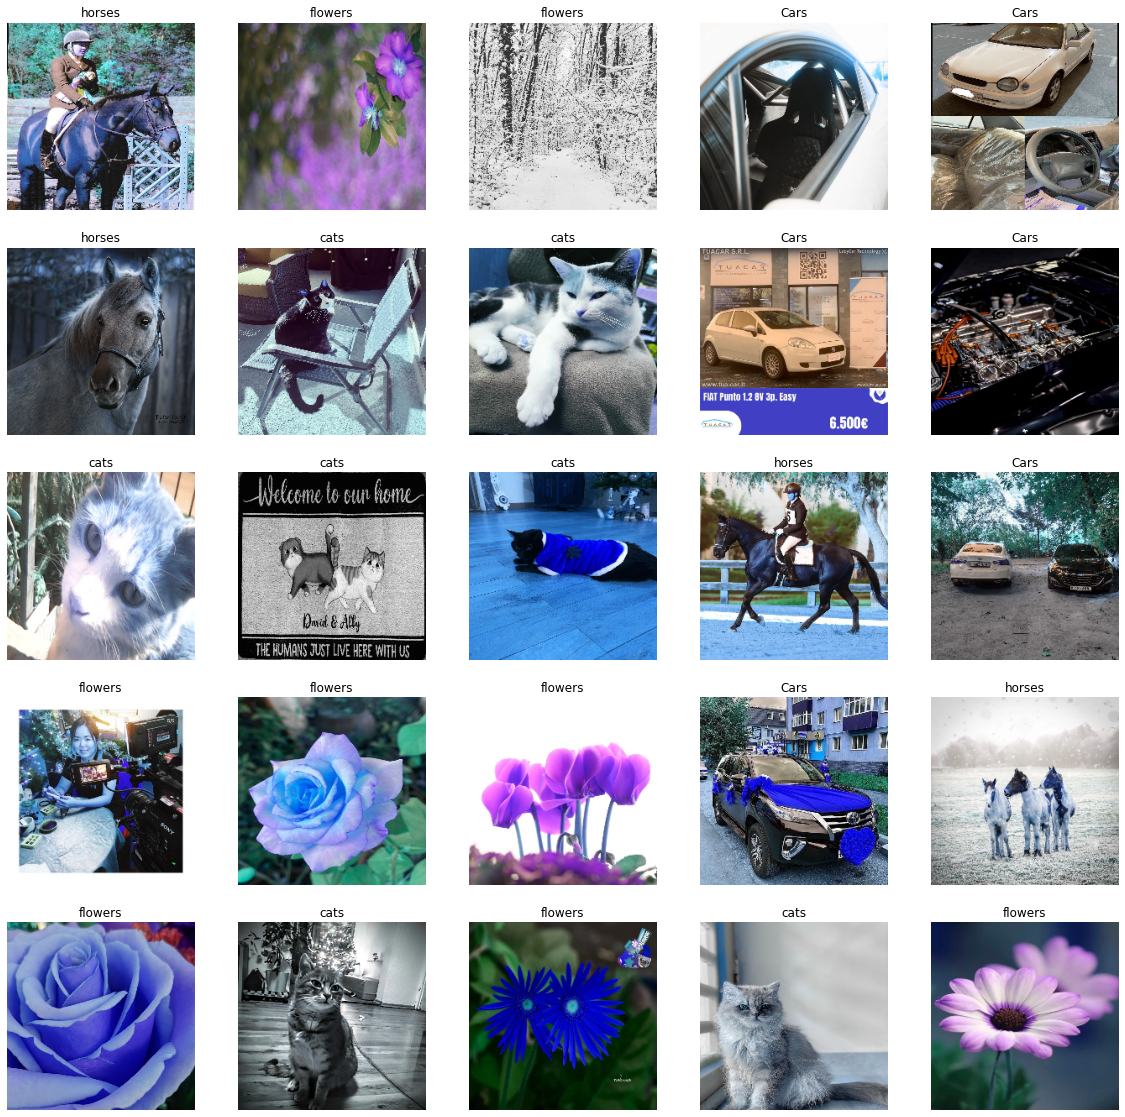

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(data),25))) : 
    plt.subplot(5,5,n+1)
    plt.imshow(data[i])   
    plt.axis('off')
    plt.title(labels[i])

# Splitting the data into Training and Testing

In [ ]:
X_train , X_test ,y_train , y_test = train_test_split(data, labels,stratify=labels ,test_size=0.2, random_state = 1) 

# Normlization

In [ ]:
x_train = np.array(X_train, dtype=np.float16) / 225.0
x_test = np.array(X_test, dtype=np.float16) / 225.0

# One Hot Encoding

In [ ]:
# One hot encoding on target variable
LE = LabelEncoder()
y_train = to_categorical(LE.fit_transform(y_train))
y_test = to_categorical(LE.fit_transform(y_test))

# Building The Model

In [ ]:
model = keras.models.Sequential([
        keras.layers.Conv2D(500,kernel_size=(3,3),activation='relu',input_shape=(img_height,img_width,img_channel)),
        keras.layers.Conv2D(250,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(2,2),      
        keras.layers.Conv2D(300,kernel_size=(3,3),activation='relu'),
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Flatten() ,    
        keras.layers.Dense(128,activation='relu') ,   
        keras.layers.Dense(64,activation='relu'),           
        keras.layers.Dense(32,activation='relu'),
        keras.layers.Dense(4,activation='softmax') ,    
        ])

In [ ]:
model.compile(optimizer ='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
print('Model Details are : ')
print(model.summary())

Model Details are : 
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 98, 98, 500)       14000     
                                                                 
 conv2d_13 (Conv2D)          (None, 96, 96, 250)       1125250   
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 48, 48, 250)      0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 46, 46, 300)       675300    
                                                                 
 conv2d_15 (Conv2D)          (None, 44, 44, 150)       405150    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 22, 22, 150)      0         
 2D)                             

In [ ]:
epochs = 50
batchSize = 64
CNN = model.fit(x_train, y_train,batch_size=batchSize, epochs=epochs,verbose=1,validation_data = (x_test , y_test))

Epoch 1/50
46/46 [==============================] - 40s 802ms/step - loss: 1.3838 - accuracy: 0.3080 - val_loss: 1.2992 - val_accuracy: 0.3752
Epoch 2/50
46/46 [==============================] - 33s 716ms/step - loss: 1.2212 - accuracy: 0.4227 - val_loss: 1.1400 - val_accuracy: 0.4638
Epoch 3/50
46/46 [==============================] - 33s 710ms/step - loss: 1.1359 - accuracy: 0.4787 - val_loss: 1.0579 - val_accuracy: 0.5239
Epoch 4/50
46/46 [==============================] - 33s 717ms/step - loss: 1.0101 - accuracy: 0.5664 - val_loss: 0.9399 - val_accuracy: 0.5989
Epoch 5/50
46/46 [==============================] - 33s 713ms/step - loss: 0.8913 - accuracy: 0.6357 - val_loss: 0.9072 - val_accuracy: 0.6180
Epoch 6/50
46/46 [==============================] - 33s 710ms/step - loss: 0.7787 - accuracy: 0.6890 - val_loss: 0.8697 - val_accuracy: 0.6671
Epoch 7/50
46/46 [==============================] - 33s 711ms/step - loss: 0.6728 - accuracy: 0.7340 - val_loss: 0.8822 - val_accuracy: 0.6603

In [ ]:
ModelLoss, ModelAccuracy = model.evaluate(x_test, y_test)

23/23 [==============================] - 4s 100ms/step - loss: 4.6272 - accuracy: 0.6071


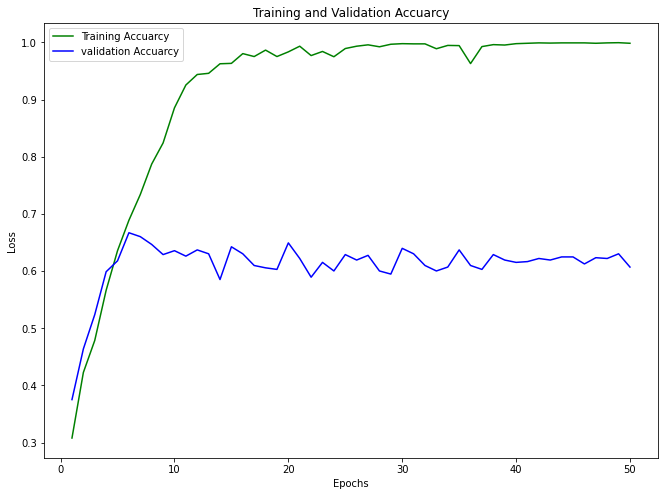

In [ ]:
plt.figure(figsize=(11,8))
acc_train = CNN.history['accuracy']
acc_val = CNN.history['val_accuracy']
plt.plot(epochs, acc_train, 'g', label='Training Accuarcy')
plt.plot(epochs, acc_val, 'b', label='validation Accuarcy')
plt.title('Training and Validation Accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

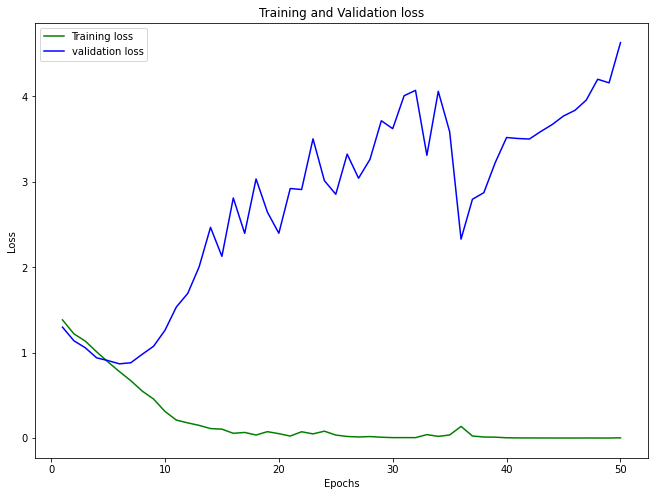

In [ ]:
plt.figure(figsize=(11,8))
loss_train = CNN.history['loss']
loss_val = CNN.history['val_loss']
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_pre = model.predict(x_test)

23/23 [==============================] - 2s 99ms/step


In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_pre]

In [ ]:
x_test.shape

(733, 100, 100, 3)

In [ ]:
x_test.shape

(733, 100, 100, 3)

In [ ]:
y_pre.shape


(733, 4)

In [ ]:
x_test

array([[[[0.4578 , 0.449  , 0.4268 ],
         [0.4978 , 0.4756 , 0.4534 ],
         [0.5376 , 0.542  , 0.5156 ],
         ...,
         [0.5244 , 0.5024 , 0.4888 ],
         [0.52   , 0.4978 , 0.4844 ],
         [0.4712 , 0.449  , 0.4355 ]],

        [[0.5244 , 0.5156 , 0.4712 ],
         [0.4934 , 0.4844 , 0.44   ],
         [0.5913 , 0.582  , 0.5376 ],
         ...,
         [0.4756 , 0.4534 , 0.44   ],
         [0.4888 , 0.4666 , 0.4534 ],
         [0.48   , 0.4578 , 0.4443 ]],

        [[0.5376 , 0.52   , 0.4978 ],
         [0.4978 , 0.4888 , 0.4443 ],
         [0.5557 , 0.547  , 0.5024 ],
         ...,
         [0.4712 , 0.449  , 0.4355 ],
         [0.4934 , 0.4712 , 0.4578 ],
         [0.4844 , 0.4622 , 0.449  ]],

        ...,

        [[0.938  , 0.9243 , 0.9023 ],
         [0.9424 , 0.9287 , 0.911  ],
         [0.938  , 0.9243 , 0.9067 ],
         ...,
         [0.9644 , 0.938  , 0.9155 ],
         [0.9644 , 0.938  , 0.9067 ],
         [0.96   , 0.933  , 0.911  ]],

        [[

# ConfusionMatrix

In [ ]:
def conf_matrix(y_test, y_pred):
    y_predicted_labels = [np.argmax(i) for i in y_pred]
    y_predicted_labels = np.array(y_predicted_labels)
    y_test = np.argmax(y_test, axis=1)
    cm = confusion_matrix(labels=y_test, predictions=y_predicted_labels)
    plt.figure(figsize=(12,10))
    heatmap(cm, annot=True, fmt='d');

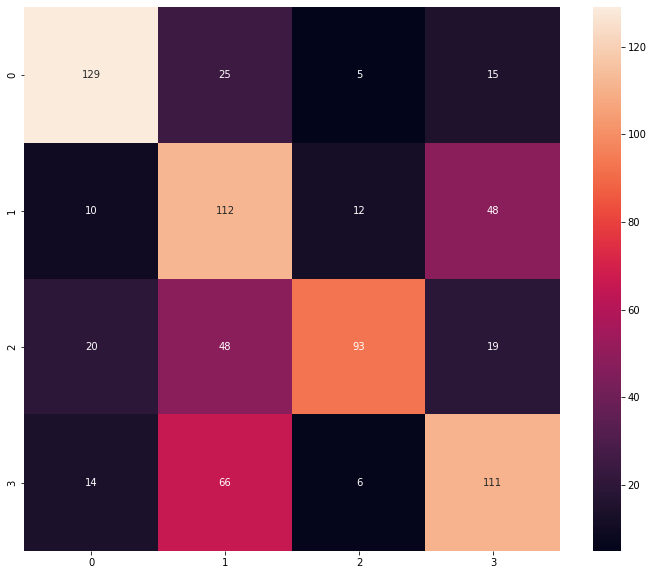

In [ ]:
conf_matrix(y_test,y_pre)